In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/Colab Notebooks/Dementia Prediction Dataset.csv"
df = pd.read_csv(file_path)

/tmp/ipython-input-602151960.py:4: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
df.head()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


In [ ]:
df.shape

(195196, 1024)

In [ ]:
new_column_list = [
"BIRTHMO", "BIRTHYR", "SEX", "HISPANIC", "HISPOR", "RACE","PRIMLANG", "EDUC", "MARISTAT", "NACCLIVS", "INDEPEND", "RESIDENC", "HANDED", "NACCAGE", "NACCNIHR", "SMOKYRS",
"PACKSPER", "ALCOCCAS", "CVHATT", "CVAFIB", "CVANGIO", "CVBYPASS", "CVPACDEF", "CVPACE", "CVCHF", "CVANGINA", "CBSTROKE", "CBTIA", "PD", "SEIZURES", "TBI", "TRAUMCHR",
"DIABETES", "HYPERTEN", "HYPERCHO", "B12DEF", "THYROID", "ARTHRIT", "INCONTU", "INCONTF","ALCOHOL", "PTSD", "BIPOLAR", "SCHIZ", "DEP2YRS", "ANXIETY", "OCD", "HEIGHT", "WEIGHT", "NACCBMI",
"VISION", "HEARING", "SATIS", "DROPACT", "EMPTY", "BORED", "SPIRITS", "AFRAID", "HAPPY", "HELPLESS", "STAYHOME", "MEMPROB", "WONDRFUL", "WRTHLESS", "ENERGY", "HOPELESS",
"BETTER", "DEMENTED"]

In [ ]:
dementia_df = df[new_column_list].copy()

In [ ]:
dementia_df.head()

,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,RACE,PRIMLANG,EDUC,MARISTAT,NACCLIVS,...,HAPPY,HELPLESS,STAYHOME,MEMPROB,WONDRFUL,WRTHLESS,ENERGY,HOPELESS,BETTER,DEMENTED
0,5,1952,1,0,88,1,1,16,1,4,...,0,1,0,9,0,0,1,1,0,0
1,5,1952,1,0,88,1,1,16,1,2,...,0,0,1,0,0,0,0,0,0,0
2,12,1956,1,0,88,1,1,16,1,2,...,1,0,0,0,0,0,0,0,0,0
3,1,1958,2,1,1,1,2,16,1,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,1
4,2,1945,1,1,1,1,1,12,3,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
dementia_df.shape

(195196, 68)

In [ ]:
# for c in new_column_list:
#   plt.figure(figsize=(10, 6))
#   sns.kdeplot(dementia_df, x=c)

# plt.show()

In [ ]:
import numpy as np

In [ ]:
nan_list = {"HISPANIC": [9], "HISPOR": [88, 99, -4], "RACE": [99],"PRIMLANG": [9], "EDUC": [99], "NACCLIVS": [9], "INDEPEND": [9], "HANDED": [9], "NACCNIHR": [99], "SMOKYRS": [88, 99, -4],"PACKSPER": [8, 9, -4], "ALCOCCAS": [9, -4],
            "CVHATT": [9, -4], "CVAFIB": [9, -4], "CVANGIO": [9, -4], "CVBYPASS": [9, -4], "CVPACDEF": [9, -4], "CVPACE": [9, -4], "CVCHF": [9, -4], "CVANGINA": [9, -4], "CBSTROKE": [9, -4], "CBTIA": [9, -4], "PD": [9, -4],
            "SEIZURES": [9, -4], "TBI": [9, -4], "TRAUMCHR": [9, -4], "DIABETES": [9, -4], "HYPERTEN": [9, -4], "HYPERCHO": [9, -4], "B12DEF": [9, -4], "THYROID": [9, -4], "ARTHRIT": [9, -4], "INCONTU": [9, -4], "INCONTF": [9, -4],
            "ALCOHOL": [9, -4], "PTSD": [9, -4], "BIPOLAR": [9, -4], "SCHIZ": [9, -4], "DEP2YRS": [9, -4], "ANXIETY": [9, -4], "OCD": [9, -4], "HEIGHT": [88.8, -4], "WEIGHT": [888, -4], "NACCBMI": [888, -4], "VISION": [9, -4],
            "HEARING": [9, -4], "SATIS": [9, -4], "DROPACT": [9, -4], "EMPTY": [9, -4], "BORED": [9, -4], "SPIRITS": [9, -4], "AFRAID": [9, -4], "HAPPY": [9, -4], "HELPLESS": [9, -4], "STAYHOME": [9, -4], "MEMPROB": [9, -4],
            "WONDRFUL": [9, -4], "WRTHLESS": [9, -4], "ENERGY": [9, -4], "HOPELESS": [9, -4], "BETTER": [9, -4]}


In [ ]:
for c in nan_list:
  dementia_df[c] = dementia_df[c].replace({j : np.nan for j in nan_list[c]})

In [ ]:
missing_values_list = []
for c in new_column_list:
  if dementia_df[c].isnull().sum() > 0:
    missing_values_list.append(c)
    # print(c)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Detect and understand missing values
# Impute missing values
# Then detect and treat outliers

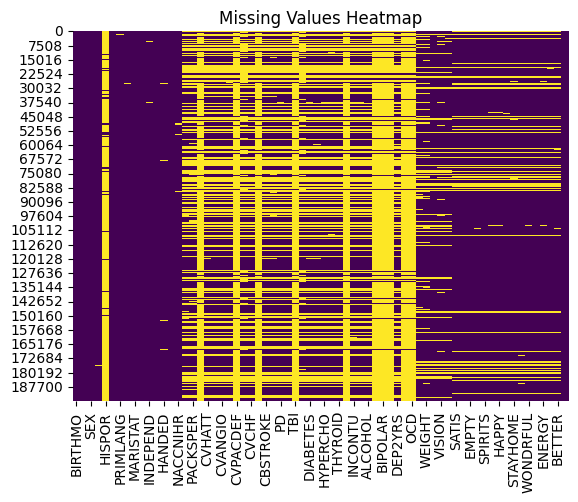

In [ ]:
sns.heatmap(dementia_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

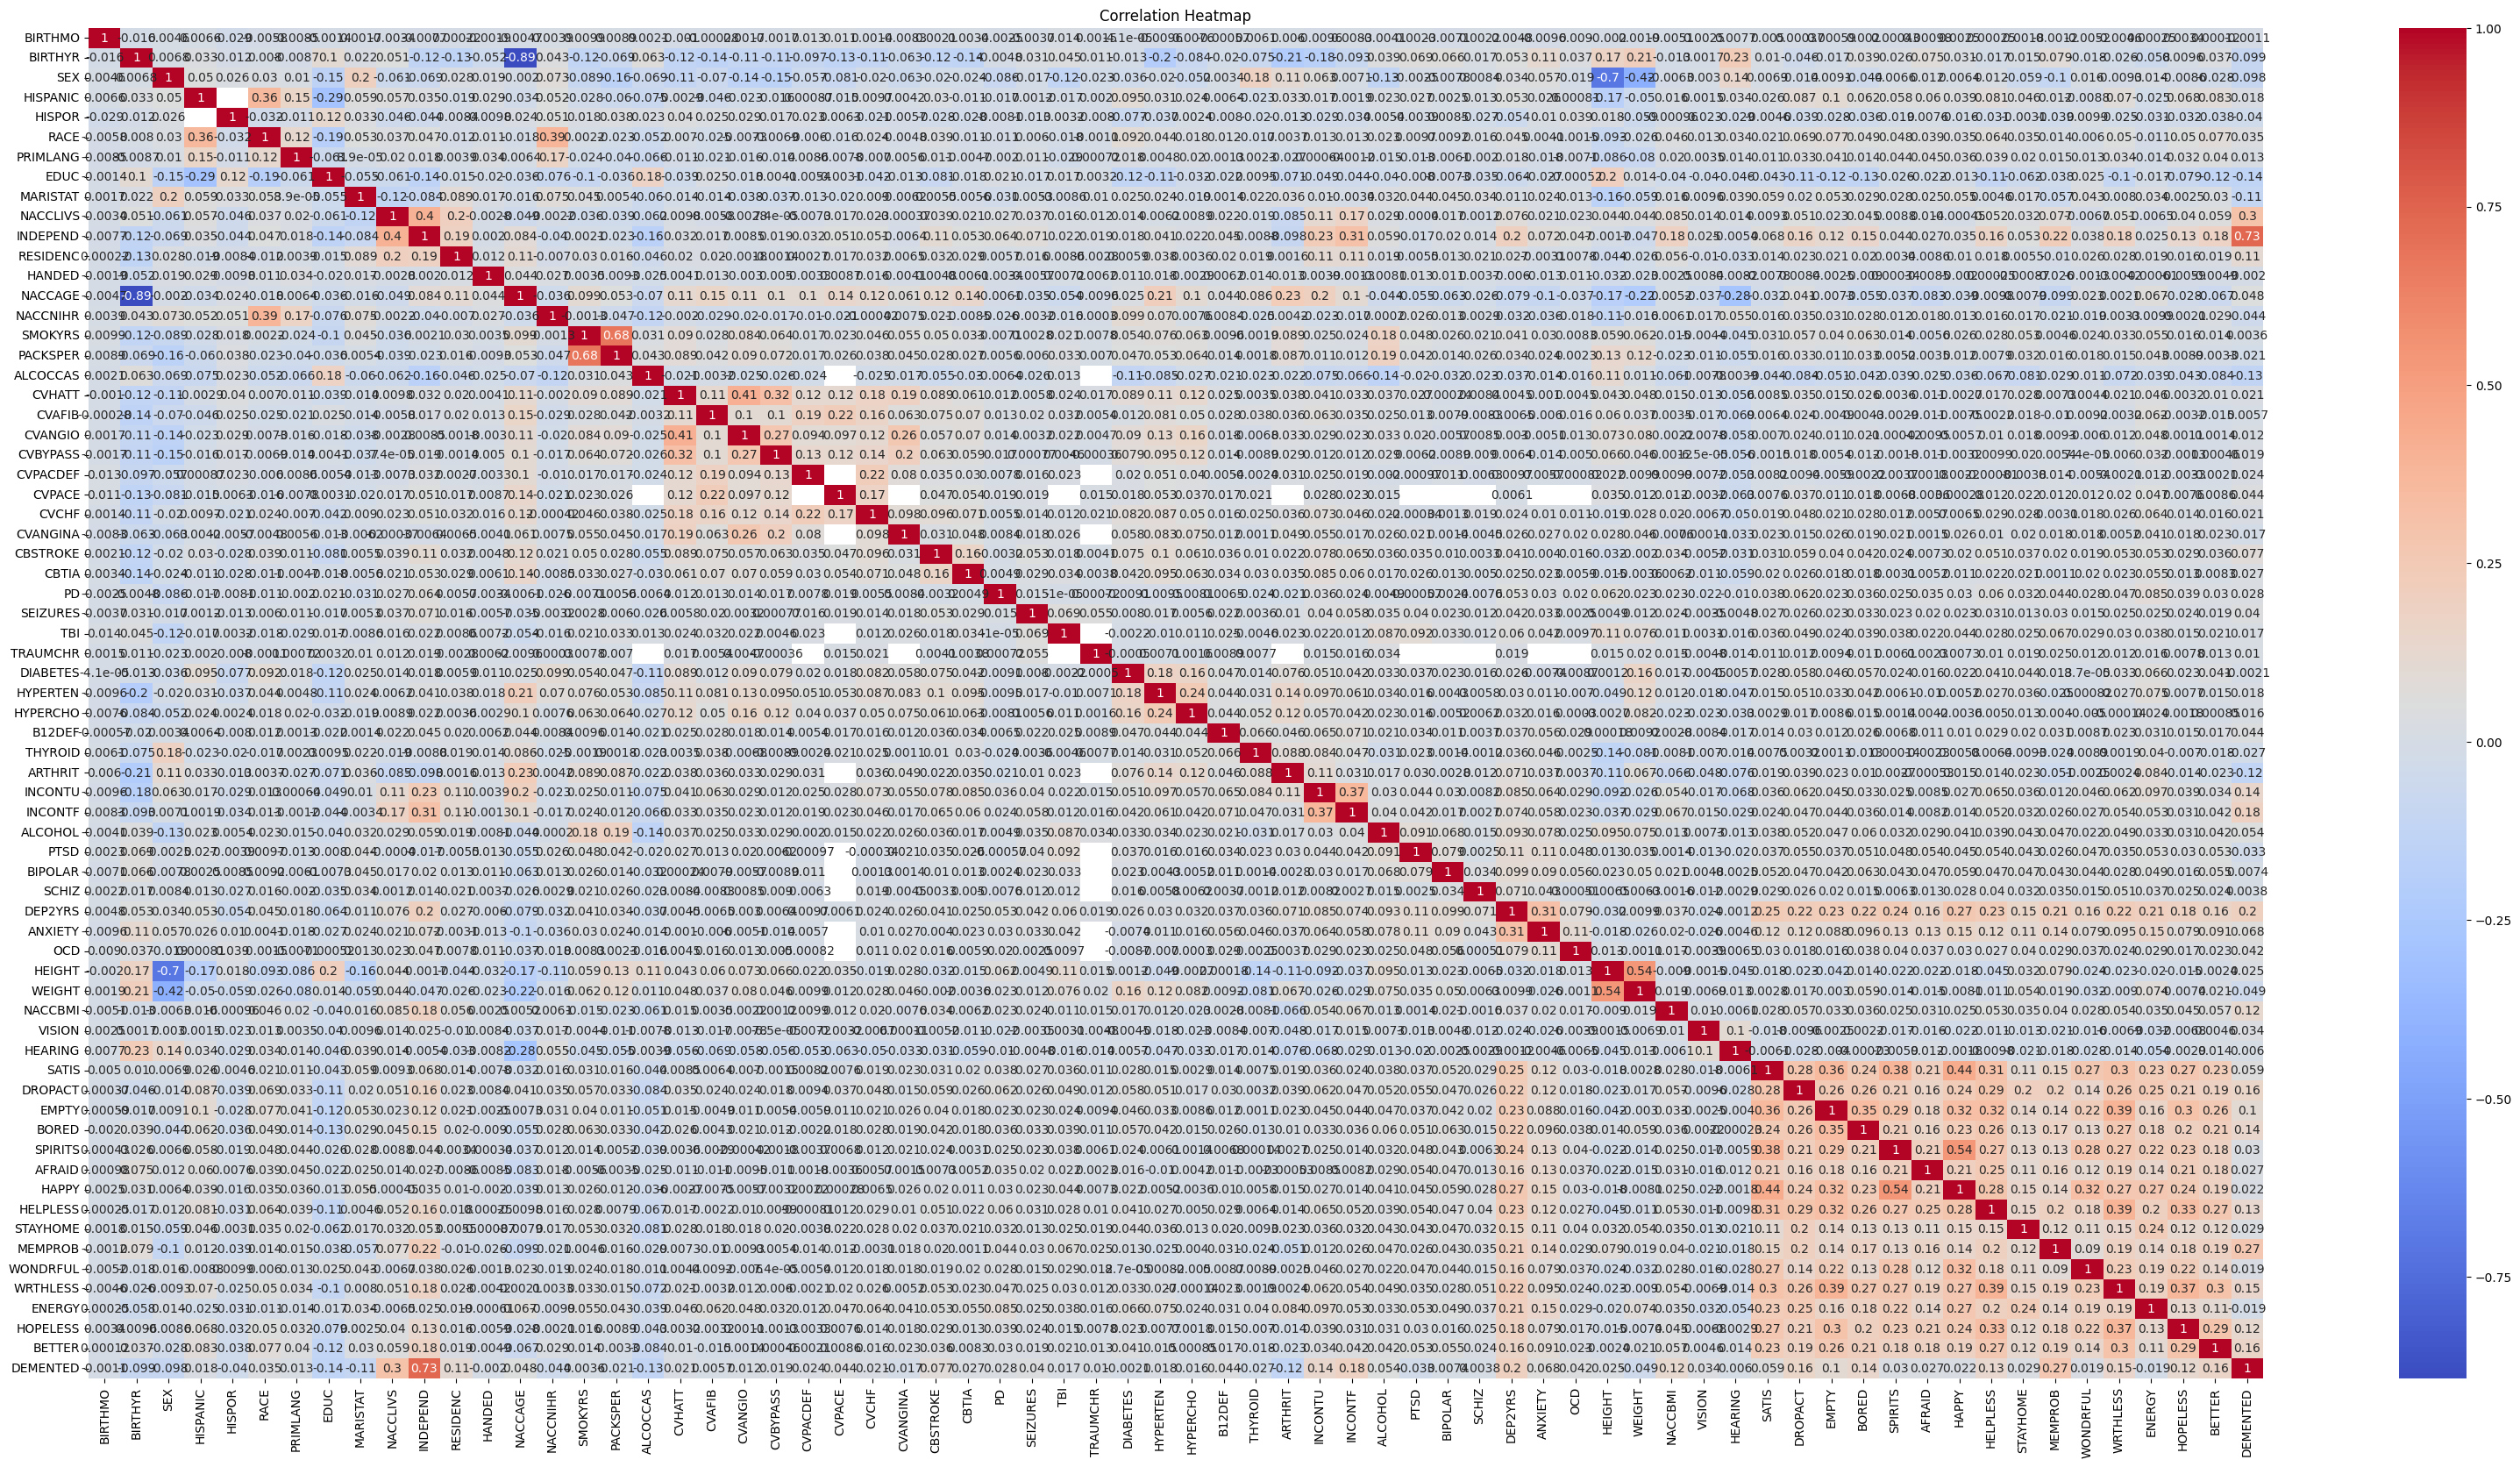

In [ ]:
plt.figure(figsize=(40, 20))
sns.heatmap(dementia_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# from scipy.stats import chi2_contingency

# dementia_df["HEIGHT_missing"] = dementia_df["HEIGHT"].isna().astype(int)

# for c in new_column_list:
#   cont = pd.crosstab(dementia_df["HEIGHT_missing"], dementia_df[c])
#   _, p, _, _ = chi2_contingency(cont)
#   print(f"{c} - p-value: {p}")

In [ ]:
# dementia_df.info()

In [ ]:
# This missing values is MAR
# So we use MICE (Iterative Imputer)

In [ ]:
X = dementia_df[dementia_df.columns[:-1]]
y = dementia_df[dementia_df.columns[-1]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
numeric_cols = ["NACCAGE", "SMOKYRS", "PACKSPER", "HEIGHT", "WEIGHT", "NACCBMI"]
cat_cols = ["BIRTHMO", "BIRTHYR", "SEX", "HISPANIC", "HISPOR", "RACE","PRIMLANG", "EDUC", "MARISTAT", "NACCLIVS", "INDEPEND", "RESIDENC", "HANDED", "NACCNIHR",
            "ALCOCCAS", "CVHATT", "CVAFIB", "CVANGIO", "CVBYPASS", "CVPACDEF", "CVPACE", "CVCHF", "CVANGINA", "CBSTROKE", "CBTIA", "PD", "SEIZURES", "TBI", "TRAUMCHR",
            "DIABETES", "HYPERTEN", "HYPERCHO", "B12DEF", "THYROID", "ARTHRIT", "INCONTU", "INCONTF","ALCOHOL", "PTSD", "BIPOLAR", "SCHIZ", "DEP2YRS", "ANXIETY", "OCD",
            "VISION", "HEARING", "SATIS", "DROPACT", "EMPTY", "BORED", "SPIRITS", "AFRAID", "HAPPY", "HELPLESS", "STAYHOME", "MEMPROB", "WONDRFUL", "WRTHLESS", "ENERGY",
            "HOPELESS", "BETTER"]

print(len(numeric_cols))
print(len(cat_cols))

6
61


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

In [ ]:
# num_imputer = IterativeImputer(random_state=0)
# X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
# X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols])

In [ ]:
# cat_imputer = IterativeImputer(random_state=0)
# X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
# X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [ ]:
# for col in cat_cols:
#   X_train[col] = X_train[col].round().astype('Int64')
#   X_test[col] = X_test[col].round().astype('Int64')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
# X_test_scaled = scaler.transform(X_test[numeric_cols])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# pca = PCA(n_components=0.95)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# X_train_final = np.hstack([X_train_pca, X_train[cat_cols].to_numpy()])
# X_test_final  = np.hstack([X_test_pca, X_test[cat_cols].to_numpy()])

# print("Train shape:", X_train_final.shape)
# print("Test shape:", X_test_final.shape)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Pipelines for different column types
numeric_transformer = Pipeline(steps=[
    ("imputer", IterativeImputer(random_state=42)),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Full model pipeline
lr_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ('pca', PCA(n_components=0.95)),
    ("lr", LogisticRegression(class_weight='balanced', max_iter=1000, solver='newton-cg'))
])

In [ ]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NACCAGE', 'SMOKYRS',
                                                   'PACKSPER', 'HEIGHT',
                                                   'WEIGHT', 'NACCBMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['BIRTHMO', 'BIRTHYR', 'SEX',
                                                   'HISPANIC', 'HISPOR', 'RA...
                                                   'PRIMLANG', 'EDUC',
                                                   'MARISTAT', 'NACCLIVS',
                                                   'INDEPEND', 'RESIDENC',
                                                   'HANDED', 'NACCNIHR',
                                                   'ALCOCCAS', 'CVHATT',
                                                   'CVAFIB', 'CVANGIO',
                                                   'CVBYPASS', 'CVPACDEF',
                                                   'CVPACE', 'CVCHF',
                                                   'CVANGINA', 'CBSTROKE',
                                                   'CBTIA', 'PD', 'SEIZURES',
                                                   'TBI', 'TRAUMCHR',
                                                   'DIABETES', ...])])),
                ('pca', PCA(n_components=0.95)),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='newton-cg'))])

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

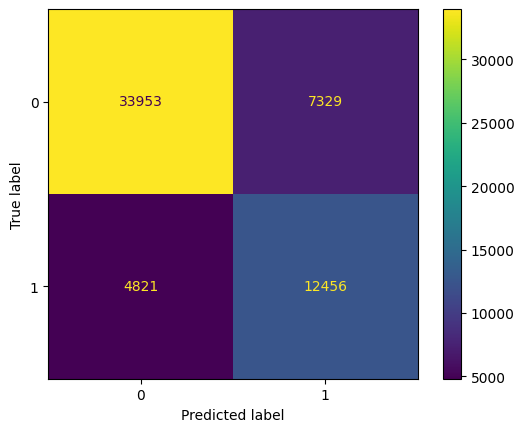

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     41282
           1       0.63      0.72      0.67     17277

    accuracy                           0.79     58559
   macro avg       0.75      0.77      0.76     58559
weighted avg       0.80      0.79      0.80     58559



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Full model pipeline
tr_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("tr", DecisionTreeClassifier(class_weight="balanced", max_depth=20, min_samples_leaf=10, random_state=42))
])

In [ ]:
tr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NACCAGE', 'SMOKYRS',
                                                   'PACKSPER', 'HEIGHT',
                                                   'WEIGHT', 'NACCBMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['BIRTHMO', 'BIRTHYR', 'SEX',
                                                   'HISPANIC', 'HISPOR', 'RACE',
                                                   'PRIMLANG', 'EDUC',
                                                   'MARISTAT', 'NACCLIVS',
                                                   'INDEPEND', 'RESIDENC',
                                                   'HANDED', 'NACCNIHR',
                                                   'ALCOCCAS', 'CVHATT',
                                                   'CVAFIB', 'CVANGIO',
                                                   'CVBYPASS', 'CVPACDEF',
                                                   'CVPACE', 'CVCHF',
                                                   'CVANGINA', 'CBSTROKE',
                                                   'CBTIA', 'PD', 'SEIZURES',
                                                   'TBI', 'TRAUMCHR',
                                                   'DIABETES', ...])])),
                ('tr',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_leaf=10,
                                        random_state=42))])

In [ ]:
y_pred = tr_model.predict(X_test)

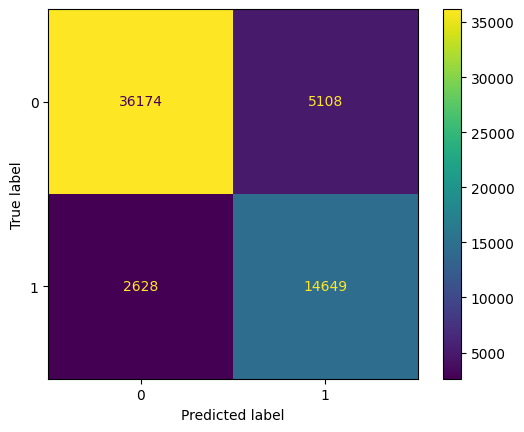

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     41282
           1       0.74      0.85      0.79     17277

    accuracy                           0.87     58559
   macro avg       0.84      0.86      0.85     58559
weighted avg       0.88      0.87      0.87     58559



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Full model pipeline
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", RandomForestClassifier(n_estimators=300, max_depth=None, class_weight='balanced', n_jobs=-1, random_state=42))
])

In [ ]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NACCAGE', 'SMOKYRS',
                                                   'PACKSPER', 'HEIGHT',
                                                   'WEIGHT', 'NACCBMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['BIRTHMO', 'BIRTHYR', 'SEX',
                                                   'HISPANIC', 'HISPOR', 'RACE',
                                                   'PRIMLANG', 'EDUC',
                                                   'MARISTAT', 'NACCLIVS',
                                                   'INDEPEND', 'RESIDENC',
                                                   'HANDED', 'NACCNIHR',
                                                   'ALCOCCAS', 'CVHATT',
                                                   'CVAFIB', 'CVANGIO',
                                                   'CVBYPASS', 'CVPACDEF',
                                                   'CVPACE', 'CVCHF',
                                                   'CVANGINA', 'CBSTROKE',
                                                   'CBTIA', 'PD', 'SEIZURES',
                                                   'TBI', 'TRAUMCHR',
                                                   'DIABETES', ...])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, n_jobs=-1,
                                        random_state=42))])

In [ ]:
y_pred = rf_model.predict(X_test)

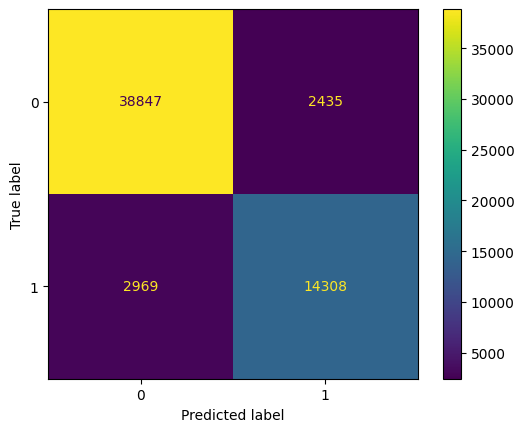

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     41282
           1       0.85      0.83      0.84     17277

    accuracy                           0.91     58559
   macro avg       0.89      0.88      0.89     58559
weighted avg       0.91      0.91      0.91     58559



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'rf__n_estimators': [100, 200, 300],  # Number of trees
    'rf__max_depth': [None, 10, 20, 30],  # Depth of trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'rf__min_samples_leaf': [1, 2, 4],    # Minimum samples at leaf nodes
    'rf__max_features': ['auto', 'sqrt', 'log2']  # Max features to consider for each split
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,                # 5-fold cross-validation
                           scoring='accuracy',  # Or use any other scoring metric you prefer
                           n_jobs=-1,           # Use all CPU cores
                           verbose=2)           # To get detailed progress

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
best_rf_model = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [ ]:
# Full model pipeline
xgb_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("xgb", XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=7, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=scale_pos_weight,
                    tree_method='hist', eval_metric='logloss'))
])

In [ ]:
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NACCAGE', 'SMOKYRS',
                                                   'PACKSPER', 'HEIGHT',
                                                   'WEIGHT', 'NACCBMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['BIRTHMO', 'BIRTHYR', 'SEX',
                                                   'HISPANIC', 'HISPOR', 'RA...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
y_pred = xgb_model.predict(X_test)

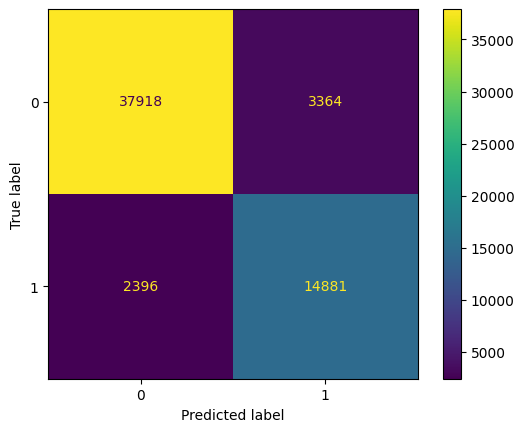

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     41282
           1       0.82      0.86      0.84     17277

    accuracy                           0.90     58559
   macro avg       0.88      0.89      0.88     58559
weighted avg       0.90      0.90      0.90     58559



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Full model pipeline
knn_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ('pca', PCA(n_components=0.95)),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

In [ ]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NACCAGE', 'SMOKYRS',
                                                   'PACKSPER', 'HEIGHT',
                                                   'WEIGHT', 'NACCBMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['BIRTHMO', 'BIRTHYR', 'SEX',
                                                   'HISPANIC', 'HISPOR', 'RACE',
                                                   'PRIMLANG', 'EDUC',
                                                   'MARISTAT', 'NACCLIVS',
                                                   'INDEPEND', 'RESIDENC',
                                                   'HANDED', 'NACCNIHR',
                                                   'ALCOCCAS', 'CVHATT',
                                                   'CVAFIB', 'CVANGIO',
                                                   'CVBYPASS', 'CVPACDEF',
                                                   'CVPACE', 'CVCHF',
                                                   'CVANGINA', 'CBSTROKE',
                                                   'CBTIA', 'PD', 'SEIZURES',
                                                   'TBI', 'TRAUMCHR',
                                                   'DIABETES', ...])])),
                ('pca', PCA(n_components=0.95)),
                ('knn', KNeighborsClassifier())])

In [ ]:
y_pred = knn_model.predict(X_test)

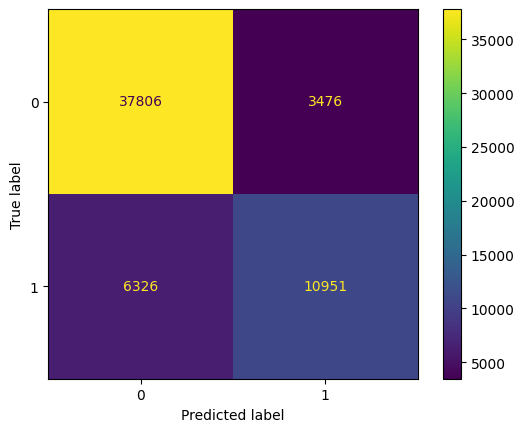

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     41282
           1       0.76      0.63      0.69     17277

    accuracy                           0.83     58559
   macro avg       0.81      0.77      0.79     58559
weighted avg       0.83      0.83      0.83     58559



In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ('pca', PCA(n_components=0.95)),
    ("mlp", MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
])

In [ ]:
nn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NACCAGE', 'SMOKYRS',
                                                   'PACKSPER', 'HEIGHT',
                                                   'WEIGHT', 'NACCBMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['BIRTHMO', 'BIRTHYR', 'SEX',
                                                   'HISPANIC', 'HISPOR', 'RACE',
                                                   'PRIMLANG', 'EDUC',
                                                   'MARISTAT', 'NACCLIVS',
                                                   'INDEPEND', 'RESIDENC',
                                                   'HANDED', 'NACCNIHR',
                                                   'ALCOCCAS', 'CVHATT',
                                                   'CVAFIB', 'CVANGIO',
                                                   'CVBYPASS', 'CVPACDEF',
                                                   'CVPACE', 'CVCHF',
                                                   'CVANGINA', 'CBSTROKE',
                                                   'CBTIA', 'PD', 'SEIZURES',
                                                   'TBI', 'TRAUMCHR',
                                                   'DIABETES', ...])])),
                ('pca', PCA(n_components=0.95)),
                ('mlp', MLPClassifier(max_iter=1000, random_state=42))])

In [ ]:
y_pred = nn_model.predict(X_test)

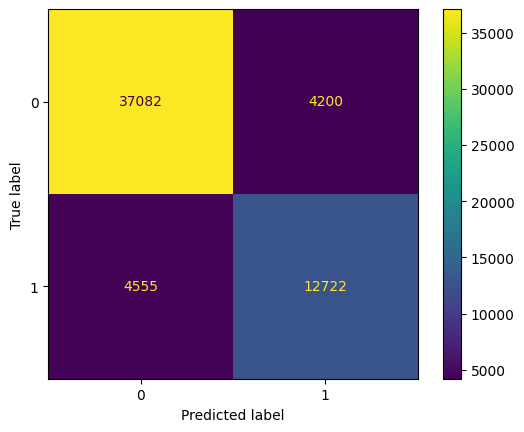

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     41282
           1       0.75      0.74      0.74     17277

    accuracy                           0.85     58559
   macro avg       0.82      0.82      0.82     58559
weighted avg       0.85      0.85      0.85     58559



In [ ]:
import tensorflow as tf

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
def build_model(input_dim, **kwargs):
    nn_model = tf.keras.models.Sequential()
    nn_model.add(tf.keras.Input(shape=(input_dim,)))
    nn_model.add(tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    nn_model.add(tf.keras.layers.LeakyReLU(negative_slope=0.01))
    nn_model.add(tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    nn_model.add(tf.keras.layers.ELU())
    nn_model.add(tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    nn_model.add(tf.keras.layers.LeakyReLU(negative_slope=0.01))
    nn_model.add(tf.keras.layers.Dropout(0.2))
    nn_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )

    return nn_model

# Custom wrapper class to integrate Keras model with sklearn pipeline
class SklearnKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=25, batch_size=32, **kwargs):
        self.epochs = epochs
        self.batch_size = batch_size
        self.kwargs = kwargs
        self.model = None

    def fit(self, X, y):
        # Determine input dimension AFTER preprocessing
        input_dim = X.shape[1]

        # Build a fresh model
        self.model = build_model(input_dim=input_dim, **self.kwargs)

        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        preds = (self.model.predict(X) > 0.5).astype("int32")
        return preds.flatten()

    def score(self, X, y):
        from sklearn.metrics import accuracy_score
        return accuracy_score(y, self.predict(X))


nn_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("tf_model", SklearnKerasClassifier(epochs=25, batch_size=32))
])

In [ ]:
nn_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = nn_model.predict(X_test)

1830/1830 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)

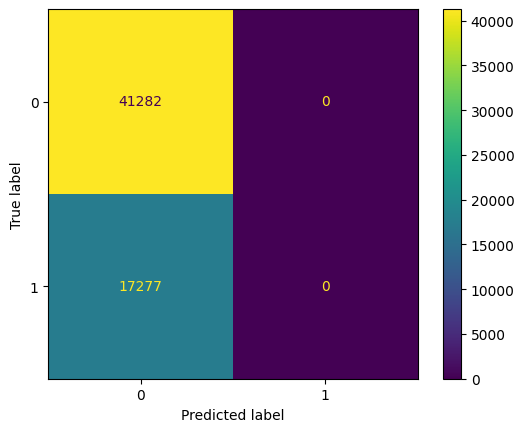

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred.ravel()))
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83     41282
           1       0.00      0.00      0.00     17277

    accuracy                           0.70     58559
   macro avg       0.35      0.50      0.41     58559
weighted avg       0.50      0.70      0.58     58559



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
